# Analyzing e-commerce data

Your csv file contains information about the sales of the products you choose. The release year, genre, ratings and number of sales for different territories are present in this file.

## Getting started with the dataset


In [69]:
# Use the pandas library to read your csv file
import sys
sys.path.append('C:/wamp64/www/ecommerce')
import pandas as pd
data = pd.read_csv('ecommerce_sample.csv', sep = ';')

In [70]:
# How many columns does it contains?
data.shape[1]

11

In [71]:
# How many **unique** product are reported in this dataset?
data['ProductId'].nunique()

1212

## Data analyze

In [72]:
# What is the oldest release year? The most recent?
data['CreationDate'].agg(['min', 'max'])

min    1970-01-14
max    2022-10-17
Name: CreationDate, dtype: object

In [73]:
# How many different publishers are present? List them
data['Supplier'].unique()

array(['corporis', 'eius', 'dolor', 'quis', 'iusto', 'enim', 'expedita',
       'distinctio', 'qui', 'repellendus', 'praesentium', 'et',
       'exercitationem', 'fugiat', 'cupiditate', 'doloremque', 'non',
       'ut', 'aut', 'occaecati', 'itaque', 'nisi', 'sint', 'est',
       'adipisci', 'reiciendis', 'officiis', 'voluptatem', 'nam', 'quia',
       'omnis', 'nobis', 'optio', 'sequi', 'mollitia', 'ullam', 'laborum',
       'voluptas', 'fugit', 'consequatur', 'quo', 'nihil', 'sed',
       'placeat', 'aliquam', 'dignissimos', 'error', 'velit', 'vel',
       'quam', 'reprehenderit', 'labore', 'natus', 'quae', 'debitis',
       'necessitatibus', 'vitae', 'tempore', 'porro', 'minima', 'ratione',
       'perspiciatis', 'ea', 'aliquid', 'in', 'quaerat', 'odit',
       'tenetur', 'id', 'voluptatibus', 'architecto', 'officia',
       'quisquam', 'impedit', 'tempora', 'ipsum', 'sapiente', 'deserunt',
       'magni', 'ipsam', 'recusandae', 'quas', 'eum', 'incidunt',
       'molestias', 'minus',

<Figure size 1000x1000 with 0 Axes>

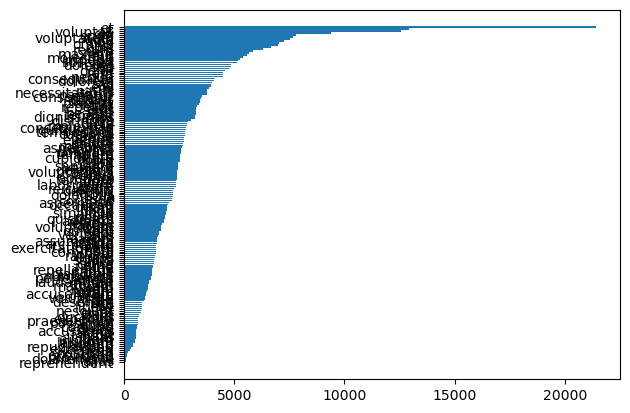

<Figure size 1000x1000 with 0 Axes>

In [74]:
# Count the number product released for each category.
# Sort them in increasing order, and print them in a 
# horizontal bar graph.
test = data[['CategoryName','Quantity']].groupby(['CategoryName']).sum()
test = test.sort_values(by=['Quantity'])
# test = pd.DataFrame(data,)
import matplotlib.pyplot as plt

test.index
# Create horizontal bars
plt.barh(test.index, test['Quantity'])
plt.figure(figsize=(10,10))


# # Create names on the x-axis
# plt.yticks(y_pos, test[0])

# # Show graphic
# plt.show()

the most selling year was in 1980 with 7208.25 $ of profit


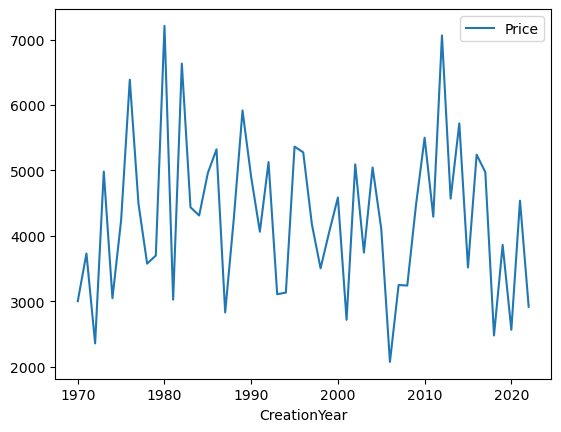

In [75]:
# Print with a plot line the global sales for each year.
# What was the most selling year?

# a = data.groupby(data['CreationDate'].map(lambda x: x[:4]))

# values = data.Price * data.Quantity

# data['CreationDate'] = data['CreationDate'].astype('datetime64[ns]')
# data.groupby(data['CreationDate'].dt.year)

# data

# data['CreationDate'].dt.year
# test = data[['CreationDate','Quantity','Price']].groupby('CreationDate').sum()
# test['Value'] = test['Price']*test['Quantity']
# test

temp = data

temp['CreationDate'] = temp['CreationDate'].astype('datetime64[ns]')
temp['CreationYear'] = pd.DatetimeIndex(temp['CreationDate']).year
viz = temp.pivot_table(index='CreationYear', values='Price', aggfunc='sum')
viz.plot()
print("the most selling year was in 1980 with",viz.max()[0],"$ of profit")

In [76]:
# What are the top 10 most selling product?
tt = data[['ProductName','Quantity']].groupby(['ProductName']).sum()
tt.nlargest(10, 'Quantity')

,Quantity
ProductName,
et,27186
qui,11033
ut,7793
voluptatem,7730
autem,7418
rerum,6966
sunt,6914
omnis,6812
aut,6715


<AxesSubplot:ylabel='Price'>

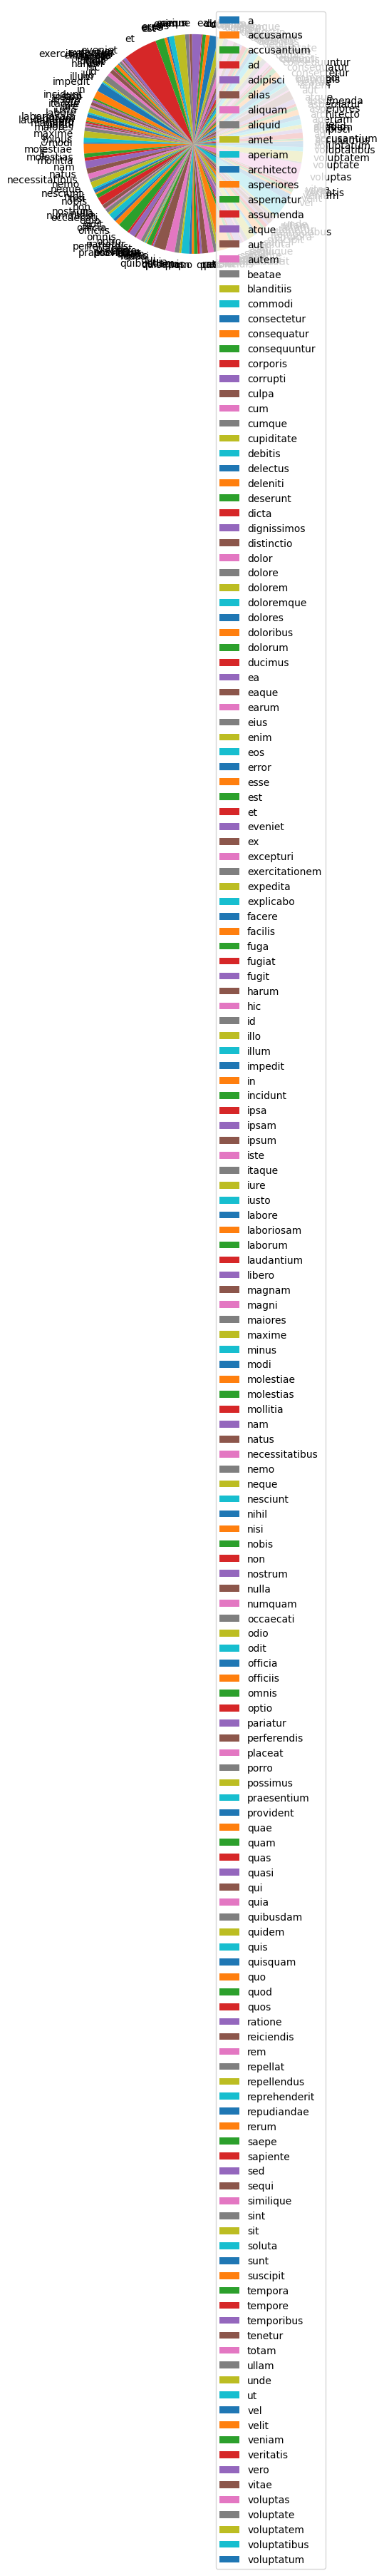

In [77]:
# Use a **pie** chart to visualize the sales of the different
# category
tt = data.groupby(['CategoryName']).sum()
tt.plot.pie(y='Price', figsize=(5, 5))


In [78]:
# What are the top 10 best selling product in one category of your choice?
filter = data.where(data['CategoryName']=="et")
# data.where(filter, inplace = True)
final = filter[['ProductName','Quantity']].groupby(['ProductName']).sum()
final.head(10)

,Quantity
ProductName,
aliquid,62.0
amet,896.0
animi,154.0
aspernatur,156.0
autem,1102.0
beatae,641.0
consequuntur,200.0
corporis,607.0
deserunt,741.0


In [79]:
# What is the average "price" for America invoices?  //////

In [80]:
# Find the ratio of invoices between America and Europe /////////////

In [81]:
# What is/are the most rated product(s) ?
mostRate = data.groupby(['ProductId'])['Rate'].count()
mostRate = mostRate.reset_index(name='Count')
mostRate = mostRate.sort_values(['Count'],ascending=False)
mostRate = mostRate.head(10)
mostRate

,ProductId,Count
987,1645,20
673,1115,20
783,1313,18
974,1621,16
89,149,16
432,727,16
962,1602,15
252,408,15
1096,1822,15
637,1065,15


In [82]:
# what is the most rated product considering the number of people who rate this one
bestRate = data.groupby(['ProductId'])['CustomerId'].count()
bestRate = bestRate.reset_index(name='Count')
bestRate = bestRate.sort_values(['Count'],ascending=False)
bestRate = bestRate.head(10)
bestRate


,ProductId,Count
987,1645,20
673,1115,20
783,1313,18
974,1621,16
89,149,16
432,727,16
962,1602,15
252,408,15
1096,1822,15
637,1065,15


In [83]:
# What is/are the best rated product(s) ?
data.pivot_table(index=['ProductId','ProductName'], values='Rate').sort_values(by='Rate', ascending=False).head(10)

,,Rate
ProductId,ProductName,
518,quasi,10.00
1340,molestias,10.00
1868,qui,9.90
1146,quae,9.90
846,porro,9.90
215,molestias,9.90
1038,laudantium,9.90
1561,laborum,9.90
1306,quam,9.90


In [84]:
# What is the number of invoice containing the product find before ?

# filter1 = data.where(data['ProductId']=="1659")
# # data.where(filter, inplace = True)
# final1 = filter1[['ProductName','ProductId']].groupby(['ProductId'])
# final1

data[data['ProductId']==1639]['InvoiceId'].nunique()

# What can you conclude about this ?
# We obtain the same result for the 3 last questions, 
# meaning that jointure of table help to analyze data together and simplify request that we need to do

2